# Importing libraries

In [2]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import pandas_datareader.data as web
import plotly.express as px
import plotly.graph_objects as go

# Dataset uploading

In [3]:
from google.colab import files
uploaded= files.upload()

Saving amazondata.csv to amazondata.csv


In [4]:
amzn_data= pd.read_csv('amazondata.csv')
amzn_data.head()

,Date,Close,Volume,Open,High,Low
0,06-09-2021,$3281.15,2455530,$3272.87,$3297.58,$3270.7
1,06-08-2021,$3264.11,3416730,$3222.61,$3279.5321,$3218.01
2,06-07-2021,$3198.01,2215756,$3197.33,$3208,$3172.2
3,06-04-2021,$3206.22,2249749,$3212,$3221,$3198.81
4,06-03-2021,$3187.01,2398293,$3204.23,$3214.435,$3184.03


# Date parsing

In [5]:
amzn_data['Date']= pd.to_datetime(amzn_data['Date'])
amzn_data['Date']= pd.to_datetime(amzn_data['Date'].dt.strftime("%m/%d/%Y"))
print(amzn_data)

           Date     Close   Volume      Open        High       Low
0    2021-06-09  $3281.15  2455530  $3272.87    $3297.58   $3270.7
1    2021-06-08  $3264.11  3416730  $3222.61  $3279.5321  $3218.01
2    2021-06-07  $3198.01  2215756  $3197.33       $3208   $3172.2
3    2021-06-04  $3206.22  2249749     $3212       $3221  $3198.81
4    2021-06-03  $3187.01  2398293  $3204.23   $3214.435  $3184.03
...         ...       ...      ...       ...         ...       ...
2511 2011-06-16   $183.65  6025431   $185.74        $187   $181.59
2512 2011-06-15   $185.98  6310918   $188.04     $192.45    $185.3
2513 2011-06-14   $189.96  3952911   $188.99     $190.72   $187.07
2514 2011-06-13   $186.29  3867735   $186.81     $189.31   $184.86
2515 2011-06-10   $186.53  3753267   $189.25     $190.77   $186.28

[2516 rows x 6 columns]


# removing $

In [6]:
amzn_data['Close']= amzn_data['Close'].str.replace('$','')
amzn_data['Open']= amzn_data['Open'].str.replace('$','')
amzn_data['High']= amzn_data['High'].str.replace('$','')
amzn_data['Low']= amzn_data['Low'].str.replace('$','')
print(amzn_data)

           Date    Close   Volume     Open       High      Low
0    2021-06-09  3281.15  2455530  3272.87    3297.58   3270.7
1    2021-06-08  3264.11  3416730  3222.61  3279.5321  3218.01
2    2021-06-07  3198.01  2215756  3197.33       3208   3172.2
3    2021-06-04  3206.22  2249749     3212       3221  3198.81
4    2021-06-03  3187.01  2398293  3204.23   3214.435  3184.03
...         ...      ...      ...      ...        ...      ...
2511 2011-06-16   183.65  6025431   185.74        187   181.59
2512 2011-06-15   185.98  6310918   188.04     192.45    185.3
2513 2011-06-14   189.96  3952911   188.99     190.72   187.07
2514 2011-06-13   186.29  3867735   186.81     189.31   184.86
2515 2011-06-10   186.53  3753267   189.25     190.77   186.28

[2516 rows x 6 columns]


# finding outlier

In [7]:
amzn_data[['Close','Open','High','Low']] =amzn_data[['Close','Open','High','Low']].apply(pd.to_numeric)
amzn_data.dtypes

Date      datetime64[ns]
Close            float64
Volume             int64
Open             float64
High             float64
Low              float64
dtype: object

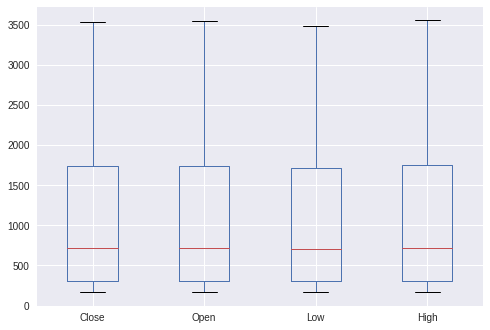

In [ ]:
amzn_data.boxplot(column=['Close','Open','Low','High'])
plt.show()

By the above graph it is unterstood that there are no outliers in all the variables adopted in historical data.


# Visualization

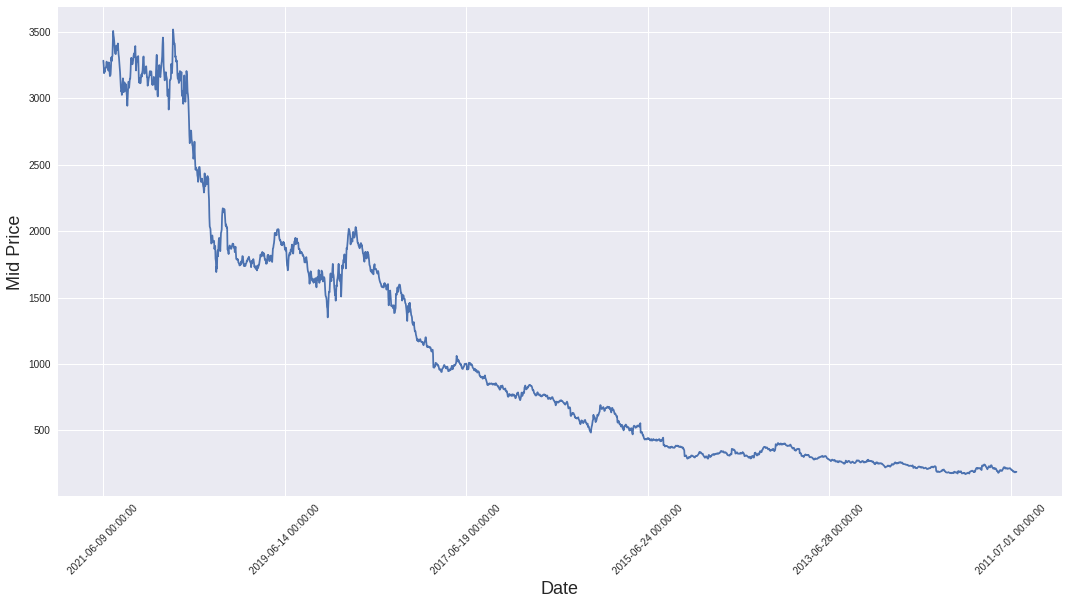

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(amzn_data.shape[0]),(amzn_data['Low']+amzn_data['High'])/2.0)
plt.xticks(range(0,amzn_data.shape[0],500),amzn_data['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [ ]:
import seaborn as sns

<Figure size 720x360 with 0 Axes>

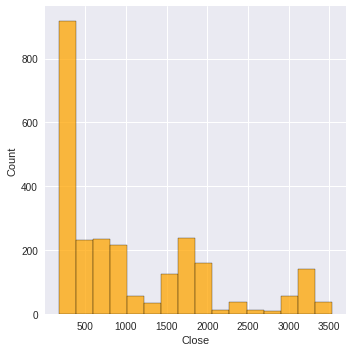

In [ ]:
plt.figure(figsize=(10,5))
sns.displot(amzn_data['Close'], color ='orange')
plt.show()

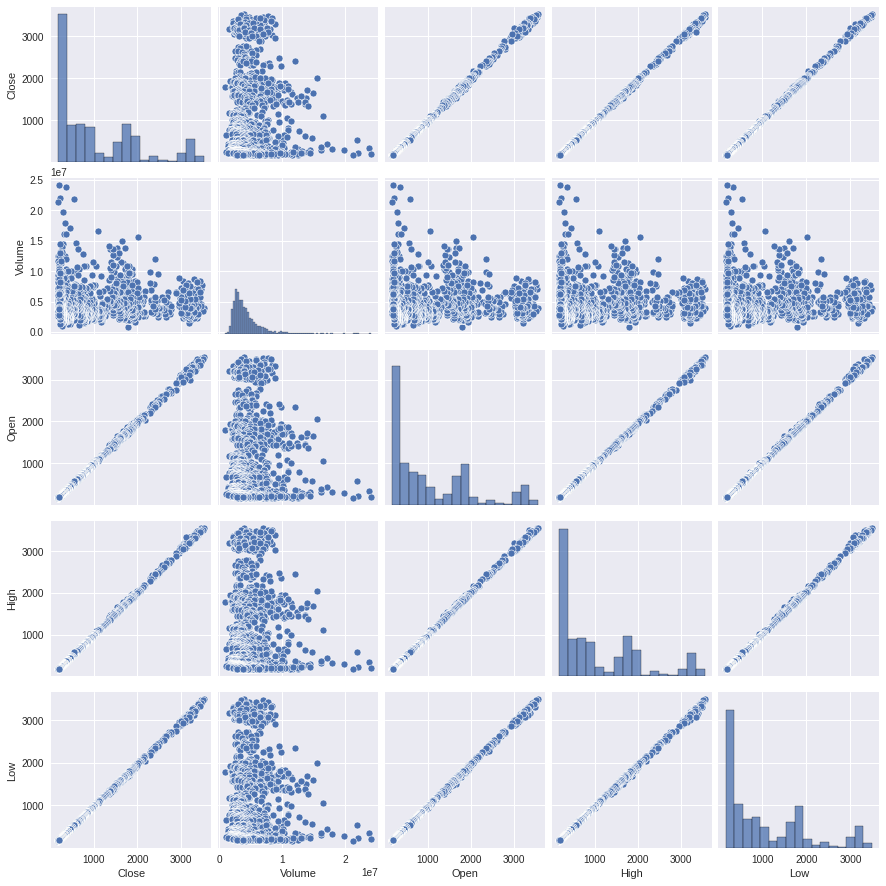

In [ ]:
sns.pairplot(amzn_data)

In [8]:
from google.colab import files
uploaded= files.upload()


Saving 2015.csv to 2015.csv
Saving 2016.csv to 2016.csv
Saving 2017.csv to 2017.csv
Saving 2018.csv to 2018.csv
Saving 2019.csv to 2019.csv
Saving 2020.csv to 2020.csv
Saving 2021.csv to 2021.csv


In [11]:
import io
df2015=pd.read_csv(io.BytesIO(uploaded['2015.csv']))
df2016=pd.read_csv(io.BytesIO(uploaded['2016.csv']))
df2017=pd.read_csv(io.BytesIO(uploaded['2017.csv']))
df2018=pd.read_csv(io.BytesIO(uploaded['2018.csv']))
df2019=pd.read_csv(io.BytesIO(uploaded['2019.csv']))
df2020=pd.read_csv(io.BytesIO(uploaded['2020.csv']))
df2021=pd.read_csv(io.BytesIO(uploaded['2021.csv']))

In [12]:
amzn_his_data= pd.concat([df2015, df2016, df2017, df2018, df2019, df2020, df2021])

In [13]:
amzn_his_data

,Date,Headlines
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...
1,2015-01-02,What to expect from Apple in 2015 beyond its s...
2,2015-01-03,Mountie: An inexpensive and innovative way to ...
3,2015-01-04,"Donald Yacktman on the Sources of Moats, His C..."
4,2015-01-05,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."
...,...,...
169,2021-06-19,Best pre-Prime Day smartwatch deals on Apple W...
170,2021-06-20,iPhone 13 rumors: As Apple's fall event gets c...
171,2021-06-21,Apple is shortening new free TV Plus trials fr...
172,2021-06-22,Google likely to soon face antitrust claims ov...


In [14]:
amzn_his_data['Date']=pd.to_datetime(amzn_his_data['Date'])

In [15]:
amzn_his_data.dtypes

Date         datetime64[ns]
Headlines            object
dtype: object

In [16]:
amzn_his_data.isnull().sum()

Date         0
Headlines    0
dtype: int64

# Preprocessing headings

In [17]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
amzn_his_data['Headlines']= amzn_his_data['Headlines'].astype(str)
amzn_his_data['Headlines']= amzn_his_data['Headlines'].apply(lambda x: x.lower())

In [19]:
import string
def char_rmvl (text):
  amzn_his_data=[char for char in text if char not in string.punctuation]
  amzn_his_data_str=''.join(new)
  amzn_his_data.clear()
  return amzn_his_data_str
  amzn_his_data['Headlines']= amzn_his_data['Headlines'].astype(str)
  amzn_his_data['Headlines']= amzn_his_data['Headlines'].apply(char_rmvl)

In [29]:
stop = stopwords.words('english')
amzn_his_data['Headlines'] = amzn_his_data['Headlines'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
amzn_his_data

,Date,Headlines
0,2015-01-01,expect apple inc. 2015? 1 reason might wrong a...
1,2015-01-02,expect apple 2015 beyond smartwatch amazon&quo...
2,2015-01-03,mountie: inexpensive innovative way attach iph...
3,2015-01-04,"donald yacktman sources moats, concern apple&q..."
4,2015-01-05,"sim-free iphone 6, 6 plus reportedly debuting ..."
...,...,...
169,2021-06-19,best pre-prime day smartwatch deals apple watc...
170,2021-06-20,iphone 13 rumors: apple's fall event gets clos...
171,2021-06-21,apple shortening new free tv plus trials year ...
172,2021-06-22,google likely soon face antitrust claims play ...


# merging files

In [30]:
amzn_eda= pd.merge(amzn_data,amzn_his_data, on=['Date'], how= 'outer')
amzn_eda



,Date,Close,Volume,Open,High,Low,Headlines
0,2021-06-09,3281.15,2455530.0,3272.87,3297.5800,3270.70,athenahealth set support ios 15 feature allows...
1,2021-06-08,3264.11,3416730.0,3222.61,3279.5321,3218.01,"apple, chinese manufacturers talks us car batt..."
2,2021-06-07,3198.01,2215756.0,3197.33,3208.0000,3172.20,apple&quot;s new &quot;private relay&quot; fea...
3,2021-06-04,3206.22,2249749.0,3212.00,3221.0000,3198.81,"global equities nearly grasp all-time record, ..."
4,2021-06-03,3187.01,2398293.0,3204.23,3214.4350,3184.03,buy rh stock dip q1 earnings growth? wwdc 2021...
...,...,...,...,...,...,...,...
3279,2021-06-19,NaN,NaN,NaN,NaN,NaN,best pre-prime day smartwatch deals apple watc...
3280,2021-06-20,NaN,NaN,NaN,NaN,NaN,iphone 13 rumors: apple's fall event gets clos...
3281,2021-06-21,NaN,NaN,NaN,NaN,NaN,apple shortening new free tv plus trials year ...
3282,2021-06-22,NaN,NaN,NaN,NaN,NaN,google likely soon face antitrust claims play ...


# Filling missing values

In [31]:
amzn_eda.isnull().sum()

Date           0
Close        748
Volume       748
Open         748
High         748
Low          748
Headlines    919
dtype: int64

In [32]:
amzn_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3284 entries, 0 to 3283
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3284 non-null   datetime64[ns]
 1   Close      2536 non-null   float64       
 2   Volume     2536 non-null   float64       
 3   Open       2536 non-null   float64       
 4   High       2536 non-null   float64       
 5   Low        2536 non-null   float64       
 6   Headlines  2365 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 205.2+ KB


In [33]:
amzn_mod= amzn_eda.dropna()
amzn_mod

,Date,Close,Volume,Open,High,Low,Headlines
0,2021-06-09,3281.15,2455530.0,3272.87,3297.5800,3270.7000,athenahealth set support ios 15 feature allows...
1,2021-06-08,3264.11,3416730.0,3222.61,3279.5321,3218.0100,"apple, chinese manufacturers talks us car batt..."
2,2021-06-07,3198.01,2215756.0,3197.33,3208.0000,3172.2000,apple&quot;s new &quot;private relay&quot; fea...
3,2021-06-04,3206.22,2249749.0,3212.00,3221.0000,3198.8100,"global equities nearly grasp all-time record, ..."
4,2021-06-03,3187.01,2398293.0,3204.23,3214.4350,3184.0300,buy rh stock dip q1 earnings growth? wwdc 2021...
...,...,...,...,...,...,...,...
1635,2015-01-08,300.46,3087475.0,300.32,303.1400,296.1100,apple company recalls 2014 shipments link list...
1636,2015-01-07,298.42,2630671.0,297.50,301.2800,295.3300,apple issues fourth developer beta os x 10.10....
1637,2015-01-06,295.29,3511003.0,302.24,303.0000,292.3800,"technology transforming cars ""phones wheels"" a..."
1638,2015-01-05,302.19,2768215.0,307.01,308.3800,300.8500,"sim-free iphone 6, 6 plus reportedly debuting ..."


In [34]:
amzn_mod.shape

(1617, 7)

In [35]:
amzn_mod.set_index('Date', inplace= True)
amzn_mod

,Close,Volume,Open,High,Low,Headlines
Date,,,,,,
2021-06-09,3281.15,2455530.0,3272.87,3297.5800,3270.7000,athenahealth set support ios 15 feature allows...
2021-06-08,3264.11,3416730.0,3222.61,3279.5321,3218.0100,"apple, chinese manufacturers talks us car batt..."
2021-06-07,3198.01,2215756.0,3197.33,3208.0000,3172.2000,apple&quot;s new &quot;private relay&quot; fea...
2021-06-04,3206.22,2249749.0,3212.00,3221.0000,3198.8100,"global equities nearly grasp all-time record, ..."
2021-06-03,3187.01,2398293.0,3204.23,3214.4350,3184.0300,buy rh stock dip q1 earnings growth? wwdc 2021...
...,...,...,...,...,...,...
2015-01-08,300.46,3087475.0,300.32,303.1400,296.1100,apple company recalls 2014 shipments link list...
2015-01-07,298.42,2630671.0,297.50,301.2800,295.3300,apple issues fourth developer beta os x 10.10....
2015-01-06,295.29,3511003.0,302.24,303.0000,292.3800,"technology transforming cars ""phones wheels"" a..."


In [36]:
amzn_mod.sort_index(ascending=True, inplace=True)
amzn_mod

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close,Volume,Open,High,Low,Headlines
Date,,,,,,
2015-01-02,308.52,2785167.0,312.58,314.7500,306.9601,expect apple 2015 beyond smartwatch amazon&quo...
2015-01-05,302.19,2768215.0,307.01,308.3800,300.8500,"sim-free iphone 6, 6 plus reportedly debuting ..."
2015-01-06,295.29,3511003.0,302.24,303.0000,292.3800,"technology transforming cars ""phones wheels"" a..."
2015-01-07,298.42,2630671.0,297.50,301.2800,295.3300,apple issues fourth developer beta os x 10.10....
2015-01-08,300.46,3087475.0,300.32,303.1400,296.1100,apple company recalls 2014 shipments link list...
...,...,...,...,...,...,...
2021-06-03,3187.01,2398293.0,3204.23,3214.4350,3184.0300,buy rh stock dip q1 earnings growth? wwdc 2021...
2021-06-04,3206.22,2249749.0,3212.00,3221.0000,3198.8100,"global equities nearly grasp all-time record, ..."
2021-06-07,3198.01,2215756.0,3197.33,3208.0000,3172.2000,apple&quot;s new &quot;private relay&quot; fea...


# Sentimental analysis



In [37]:
import os

In [38]:
os.getcwd()

'/content'

In [39]:
amzn_mod['compound']=''
amzn_mod['negative']=''
amzn_mod['neutral']=''
amzn_mod['positive']=''
amzn_mod

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,Close,Volume,Open,High,Low,Headlines,compound,negative,neutral,positive
Date,,,,,,,,,,
2015-01-02,308.52,2785167.0,312.58,314.7500,306.9601,expect apple 2015 beyond smartwatch amazon&quo...,,,,
2015-01-05,302.19,2768215.0,307.01,308.3800,300.8500,"sim-free iphone 6, 6 plus reportedly debuting ...",,,,
2015-01-06,295.29,3511003.0,302.24,303.0000,292.3800,"technology transforming cars ""phones wheels"" a...",,,,
2015-01-07,298.42,2630671.0,297.50,301.2800,295.3300,apple issues fourth developer beta os x 10.10....,,,,
2015-01-08,300.46,3087475.0,300.32,303.1400,296.1100,apple company recalls 2014 shipments link list...,,,,
...,...,...,...,...,...,...,...,...,...,...
2021-06-03,3187.01,2398293.0,3204.23,3214.4350,3184.0300,buy rh stock dip q1 earnings growth? wwdc 2021...,,,,
2021-06-04,3206.22,2249749.0,3212.00,3221.0000,3198.8100,"global equities nearly grasp all-time record, ...",,,,
2021-06-07,3198.01,2215756.0,3197.33,3208.0000,3172.2000,apple&quot;s new &quot;private relay&quot; fea...,,,,


In [40]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [42]:
sd=  SentimentIntensityAnalyzer()

In [43]:
amzn_mod['compound']=amzn_mod['Headlines'].apply(lambda x: sd.polarity_scores(x)['compound'])
amzn_mod['positive']=amzn_mod['Headlines'].apply(lambda x: sd.polarity_scores(x)['pos'])
amzn_mod['negative']=amzn_mod['Headlines'].apply(lambda x: sd.polarity_scores(x)['neg'])
amzn_mod['neutral']=amzn_mod['Headlines'].apply(lambda x: sd.polarity_scores(x)['neu'])
amzn_mod

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,Close,Volume,Open,High,Low,Headlines,compound,negative,neutral,positive
Date,,,,,,,,,,
2015-01-02,308.52,2785167.0,312.58,314.7500,306.9601,expect apple 2015 beyond smartwatch amazon&quo...,0.9881,0.052,0.809,0.139
2015-01-05,302.19,2768215.0,307.01,308.3800,300.8500,"sim-free iphone 6, 6 plus reportedly debuting ...",0.9949,0.025,0.833,0.142
2015-01-06,295.29,3511003.0,302.24,303.0000,292.3800,"technology transforming cars ""phones wheels"" a...",0.6189,0.059,0.874,0.066
2015-01-07,298.42,2630671.0,297.50,301.2800,295.3300,apple issues fourth developer beta os x 10.10....,-0.8334,0.090,0.835,0.075
2015-01-08,300.46,3087475.0,300.32,303.1400,296.1100,apple company recalls 2014 shipments link list...,0.9959,0.047,0.808,0.145
...,...,...,...,...,...,...,...,...,...,...
2021-06-03,3187.01,2398293.0,3204.23,3214.4350,3184.0300,buy rh stock dip q1 earnings growth? wwdc 2021...,0.9935,0.054,0.834,0.113
2021-06-04,3206.22,2249749.0,3212.00,3221.0000,3198.8100,"global equities nearly grasp all-time record, ...",0.9943,0.033,0.867,0.101
2021-06-07,3198.01,2215756.0,3197.33,3208.0000,3172.2000,apple&quot;s new &quot;private relay&quot; fea...,0.9968,0.023,0.873,0.104


In [45]:
amzn_mod.columns

Index(['Close', 'Volume', 'Open', 'High', 'Low', 'Headlines', 'compound',
       'negative', 'neutral', 'positive'],
      dtype='object')

In [46]:
amzn_mod= amzn_mod[['Close','compound','negative','neutral','positive','Open','High','Low','Volume']]
amzn_mod

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2015-01-02,308.52,0.9881,0.052,0.809,0.139,312.58,314.7500,306.9601,2785167.0
2015-01-05,302.19,0.9949,0.025,0.833,0.142,307.01,308.3800,300.8500,2768215.0
2015-01-06,295.29,0.6189,0.059,0.874,0.066,302.24,303.0000,292.3800,3511003.0
2015-01-07,298.42,-0.8334,0.090,0.835,0.075,297.50,301.2800,295.3300,2630671.0
2015-01-08,300.46,0.9959,0.047,0.808,0.145,300.32,303.1400,296.1100,3087475.0
...,...,...,...,...,...,...,...,...,...
2021-06-03,3187.01,0.9935,0.054,0.834,0.113,3204.23,3214.4350,3184.0300,2398293.0
2021-06-04,3206.22,0.9943,0.033,0.867,0.101,3212.00,3221.0000,3198.8100,2249749.0
2021-06-07,3198.01,0.9968,0.023,0.873,0.104,3197.33,3208.0000,3172.2000,2215756.0


# data preparation

In [47]:
amznstockdata= amzn_mod.to_csv('amznstockdata.csv')

In [48]:
amznstockdata= pd.read_csv('amznstockdata.csv', index_col=False)
amznstockdata.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
amznstockdata.set_index('Date', inplace=True)
amznstockdata

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2015-01-02,308.52,0.9881,0.052,0.809,0.139,312.58,314.7500,306.9601,2785167.0
2015-01-05,302.19,0.9949,0.025,0.833,0.142,307.01,308.3800,300.8500,2768215.0
2015-01-06,295.29,0.6189,0.059,0.874,0.066,302.24,303.0000,292.3800,3511003.0
2015-01-07,298.42,-0.8334,0.090,0.835,0.075,297.50,301.2800,295.3300,2630671.0
2015-01-08,300.46,0.9959,0.047,0.808,0.145,300.32,303.1400,296.1100,3087475.0
...,...,...,...,...,...,...,...,...,...
2021-06-03,3187.01,0.9935,0.054,0.834,0.113,3204.23,3214.4350,3184.0300,2398293.0
2021-06-04,3206.22,0.9943,0.033,0.867,0.101,3212.00,3221.0000,3198.8100,2249749.0
2021-06-07,3198.01,0.9968,0.023,0.873,0.104,3197.33,3208.0000,3172.2000,2215756.0


In [49]:
amznstockdata.shape


(1617, 9)

In [50]:
amznstockdata.isna().any()

Close       False
compound    False
negative    False
neutral     False
positive    False
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [51]:
amznstockdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1617 entries, 2015-01-02 to 2021-06-09
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     1617 non-null   float64
 1   compound  1617 non-null   float64
 2   negative  1617 non-null   float64
 3   neutral   1617 non-null   float64
 4   positive  1617 non-null   float64
 5   Open      1617 non-null   float64
 6   High      1617 non-null   float64
 7   Low       1617 non-null   float64
 8   Volume    1617 non-null   float64
dtypes: float64(9)
memory usage: 126.3+ KB


In [52]:
amznstockdata.describe(include='all')

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
count,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1.617000e+03
mean,1501.214434,0.719401,0.066596,0.809734,0.123697,1501.972480,1517.418128,1484.268816,4.247663e+06
std,895.173243,0.601623,0.030848,0.038196,0.033219,896.513386,907.027133,884.037684,2.160229e+06
min,286.950000,-0.999300,0.000000,0.659000,0.000000,286.280000,290.790000,285.250000,8.813370e+05
25%,753.670000,0.903500,0.046000,0.787000,0.102000,756.000000,758.890000,747.700000,2.828391e+06
50%,1470.900000,0.984500,0.061000,0.810000,0.123000,1466.890000,1501.050000,1448.447500,3.673116e+06
75%,1898.530000,0.994600,0.082000,0.834000,0.143000,1901.640000,1916.210000,1882.290000,4.981311e+06
max,3531.450000,0.999300,0.245000,0.971000,0.271000,3547.000000,3554.000000,3486.685000,2.384672e+07


In [53]:
#data to be used for each column
close_price= amznstockdata.iloc[:,0]
#print close price
print("Close Price")
close_price

Close Price


Date
2015-01-02     308.52
2015-01-05     302.19
2015-01-06     295.29
2015-01-07     298.42
2015-01-08     300.46
               ...   
2021-06-03    3187.01
2021-06-04    3206.22
2021-06-07    3198.01
2021-06-08    3264.11
2021-06-09    3281.15
Name: Close, Length: 1617, dtype: float64

In [54]:
#concatenating the captured train data into a df
need_data = pd.concat([close_price], axis=1)
#revised stock data column name
need_data.columns = ['close_price']
need_data.tail(15)

,close_price
Date,
2021-05-19,3231.80
2021-05-20,3247.68
2021-05-21,3203.08
2021-05-24,3244.99
2021-05-25,3259.05
2021-05-26,3265.16
2021-05-27,3230.11
2021-05-28,3223.07
2021-06-01,3218.65


In [55]:
#converting a numpy array
amzndataset= need_data.values

# Test & train split 

In [56]:
#number of rows
training_data_len = math.ceil(len(amzndataset)*.8)
training_data_len

1294

In [57]:
#scaling the target data and featuring df
scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(amzndataset)
print(amzndataset)

[[ 308.52]
 [ 302.19]
 [ 295.29]
 ...
 [3198.01]
 [3264.11]
 [3281.15]]


In [58]:
#training data set
train_data = scaler_data[0:training_data_len, :]

#spliting data into training sets
x_train =[]
y_train=[]
past_days= 15
for i in range(past_days, len(train_data)):
  x_train.append(train_data[i-past_days:i, :])
  y_train.append(train_data[i, 0])
  if i<= past_days:
    print(x_train)
    print(y_train)
    print()

[array([[0.00664817],
       [0.00469718],
       [0.0025705 ],
       [0.00353521],
       [0.00416397],
       [0.00307597],
       [0.00137463],
       [0.00240099],
       [0.00194791],
       [0.        ],
       [0.00116813],
       [0.00076745],
       [0.0031746 ],
       [0.00720296],
       [0.00784096]])]
[0.006999537679149334]



In [59]:
#coverting train to numpy array
x_train, y_train= np.array(x_train), np.array(y_train)

In [60]:
#reshape the data to 3 dimension data
x_train= np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.00664817],
        [0.00469718],
        [0.0025705 ],
        ...,
        [0.0031746 ],
        [0.00720296],
        [0.00784096]],

       [[0.00469718],
        [0.0025705 ],
        [0.00353521],
        ...,
        [0.00720296],
        [0.00784096],
        [0.00699954]],

       [[0.0025705 ],
        [0.00353521],
        [0.00416397],
        ...,
        [0.00784096],
        [0.00699954],
        [0.00610264]],

       ...,

       [[0.52928032],
        [0.54329481],
        [0.54027431],
        ...,
        [0.57517337],
        [0.55756511],
        [0.53084913]],

       [[0.54329481],
        [0.54027431],
        [0.54346741],
        ...,
        [0.55756511],
        [0.53084913],
        [0.51958391]],

       [[0.54027431],
        [0.54346741],
        [0.55242102],
        ...,
        [0.53084913],
        [0.51958391],
        [0.52169518]]])

In [61]:
print(x_train.shape)
print(y_train.shape)

(1279, 15, 1)
(1279,)


In [62]:
np.random.seed(2000)
import keras.models
import tensorflow
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential

In [74]:
model = Sequential()
model.add(LSTM(160, return_sequences=True, activation="tanh", input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(80, return_sequences=False , activation="tanh"))
model.add(Dense(60))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 15, 160)           103680    
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 160)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 80)                77120     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                4860      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61        
Total params: 185,721
Trainable params: 185,721
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [76]:
#train the model
from keras.callbacks import EarlyStopping
early_stop= EarlyStopping(monitor= 'val_loss', mode= 'min', verbose= 1, patience= 5)
history= model.fit(x_train, y_train, batch_size=64, epochs=100, verbose=1, validation_split=0.2, callbacks= [early_stop])

Epoch 1/100
16/16 [==============================] - 6s 121ms/step - loss: 0.0200 - val_loss: 7.1588e-04
Epoch 2/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 3/100
16/16 [==============================] - 1s 58ms/step - loss: 5.2593e-04 - val_loss: 4.7834e-04
Epoch 4/100
16/16 [==============================] - 1s 55ms/step - loss: 2.5477e-04 - val_loss: 3.7767e-04
Epoch 5/100
16/16 [==============================] - 1s 58ms/step - loss: 2.0921e-04 - val_loss: 3.7889e-04
Epoch 6/100
16/16 [==============================] - 1s 57ms/step - loss: 1.9896e-04 - val_loss: 3.8368e-04
Epoch 7/100
16/16 [==============================] - 1s 58ms/step - loss: 2.1611e-04 - val_loss: 3.3061e-04
Epoch 8/100
16/16 [==============================] - 1s 58ms/step - loss: 2.2174e-04 - val_loss: 3.2795e-04
Epoch 9/100
16/16 [==============================] - 1s 58ms/step - loss: 2.3376e-04 - val_loss: 4.0577e-04
Epoch 10/100
16/16 [===================

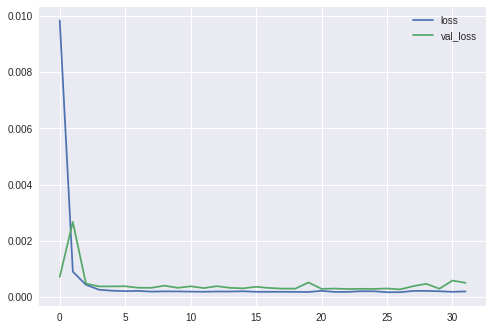

In [77]:
#plotting loss
loss= pd.DataFrame(model.history.history)
loss.plot()

In [78]:
#Creating the testing data set
test_data = scaler_data[training_data_len - past_days:, :]

#creating the datasets
x_test=[]
y_test= amzndataset[training_data_len:, 0]
for i in range (past_days, len(test_data)):
  x_test.append(test_data[i- past_days:i, :])

In [79]:
#convert the data to numpy array
x_test= np.array(x_test)

#reshaping the data
x_data= np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))


In [80]:
#get the model predicted price 
predictions= model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
predictions

array([[1999.5546],
       [1971.0613],
       [1948.7059],
       [1928.4841],
       [1916.2211],
       [1905.8881],
       [1895.9418],
       [1879.6392],
       [1867.315 ],
       [1853.0546],
       [1828.4308],
       [1807.5063],
       [1783.4355],
       [1767.9729],
       [1760.3503],
       [1762.1011],
       [1766.5585],
       [1776.1989],
       [1791.0856],
       [1803.6277],
       [1819.107 ],
       [1830.8898],
       [1844.3866],
       [1856.2179],
       [1863.5419],
       [1868.6061],
       [1870.3416],
       [1877.1619],
       [1886.9469],
       [1900.3691],
       [1914.8165],
       [1938.1327],
       [1972.9001],
       [2013.5312],
       [2061.9543],
       [2108.216 ],
       [2151.098 ],
       [2183.2769],
       [2209.284 ],
       [2232.1343],
       [2251.9507],
       [2266.021 ],
       [2270.9133],
       [2274.5608],
       [2284.4946],
       [2283.699 ],
       [2278.87  ],
       [2272.0806],
       [2267.3582],
       [2265.2686],


# RMSE value

In [82]:
rmse= np.sqrt(np.mean(predictions - y_test)**2)
print("RMSE =", rmse)

RMSE = 181.94752538155475


# Model prediction

In [83]:
#plot the data
import copy
valid= copy.deepcopy(amzn_mod[training_data_len:])
valid['Predictions']= predictions

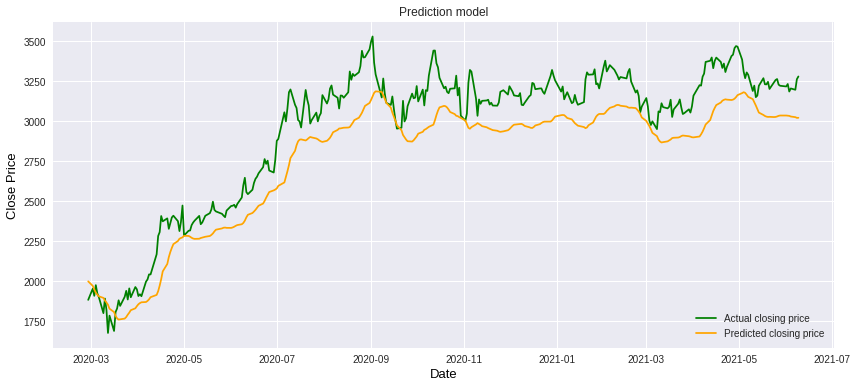

In [84]:
plt.figure(figsize=(14,6))
plt.title('Prediction model')
plt.xlabel('Date', fontsize = 13, color='black')
plt.ylabel('Close Price', fontsize=13, color='black')
plt.plot(valid['Close'], color='green', label= 'Actual closing price')
plt.plot(valid['Predictions'], color='orange', label= 'Predicted closing price')
plt.legend(loc= 'lower right', fontsize=10)
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
plt.show()

In [85]:
valid

,Close,compound,negative,neutral,positive,Open,High,Low,Volume,Predictions
Date,,,,,,,,,,
2020-02-28,1883.75,0.9137,0.055,0.857,0.088,1814.63,1889.7600,1811.1290,9493797.0,1999.554565
2020-03-02,1953.95,0.8896,0.108,0.787,0.105,1906.49,1954.5100,1870.0000,6761651.0,1971.061279
2020-03-03,1908.99,0.9889,0.051,0.824,0.124,1975.37,1996.3300,1888.0901,7534491.0,1948.705933
2020-03-04,1975.83,0.9871,0.056,0.817,0.127,1946.57,1978.0000,1922.0000,4772919.0,1928.484131
2020-03-05,1924.03,0.9945,0.074,0.770,0.155,1933.00,1960.7200,1910.0000,4748210.0,1916.221069
...,...,...,...,...,...,...,...,...,...,...
2021-06-03,3187.01,0.9935,0.054,0.834,0.113,3204.23,3214.4350,3184.0300,2398293.0,3034.742432
2021-06-04,3206.22,0.9943,0.033,0.867,0.101,3212.00,3221.0000,3198.8100,2249749.0,3030.717285
2021-06-07,3198.01,0.9968,0.023,0.873,0.104,3197.33,3208.0000,3172.2000,2215756.0,3026.670898


In [ ]:
print(l)

# Predicting close value for next day

In [91]:
from datetime import datetime, timedelta
last_day = amznstockdata.index[-1]
#next_day = last_day + datetime.timedelta(days = 1)
print(last_day)

2021-06-09


In [103]:
next_day = datetime.strptime(last_day, '%Y-%m-%d') + timedelta(days = 1)
print(next_day)

2021-06-10 00:00:00


In [104]:
new_df = amznstockdata.filter(['Close'])
# Extracting last 30 day Close price values and convert the dataframe to an array
prev_30_days = new_df[-30: ].values
# Rescaling the data
prev_30_days_scaled = scaler.transform(prev_30_days)
X_test = []
X_test.append(prev_30_days_scaled)
# Converting X_test to a numpy array
X_test = np.array(X_test)
# Reshaping the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Rescaling to prev form
pred_price = scaler.inverse_transform(pred_price)
print('Predicted Close Price for {} '.format(next_day) + ' = ', pred_price)

Predicted Close Price for 2021-06-10 00:00:00  =  [[3030.8157]]


In [105]:
prev = pred_price
prev_pred_price = new_df.at[str(last_day), 'Close']

In [106]:
diff=(float)(pred_price - prev_pred_price)
if(diff < 0):
  print("Percentage decrease = ",round(((- (diff)/prev_pred_price)*100),4))
else:
  print("Percentage increase = ",round((( (diff)/prev_pred_price)*100),4))

Percentage decrease =  7.6295


In [107]:
model.save('model.h5')